<a href="https://colab.research.google.com/github/joaobizzo/data_science_study/blob/main/data_science_study/EXS_CEUB/exercicios/Modelo_para_Diabetes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import seaborn as sns

In [4]:
dados = pd.read_csv('diabets.csv')
dados

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [5]:
from pandas_profiling import ProfileReport

profile = ProfileReport(dados)

profile.to_file("Relatorio.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

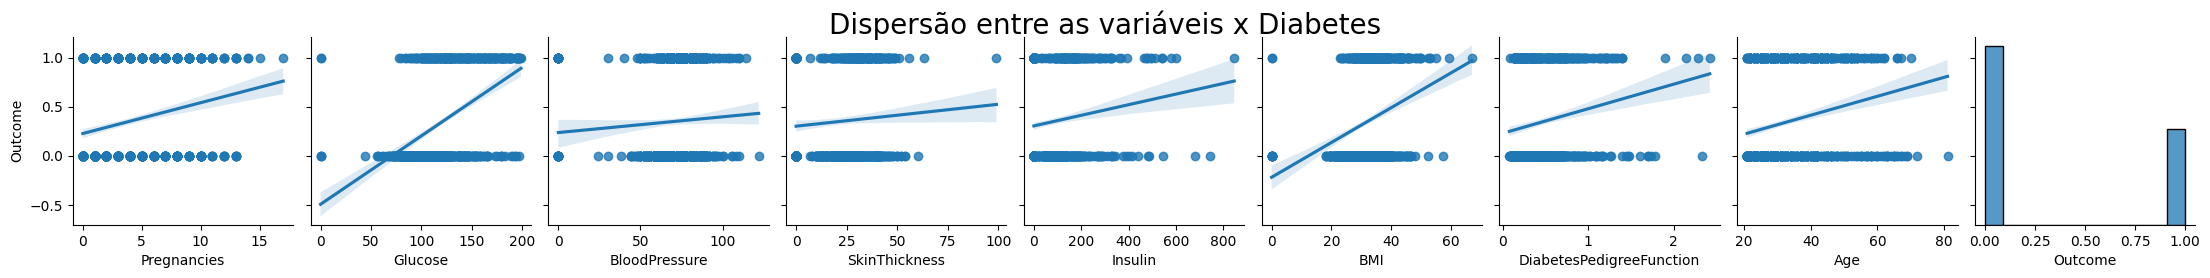

In [6]:
ax = sns.pairplot(dados, y_vars='Outcome',
                  x_vars=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin','BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
                  kind='reg')
ax.fig.suptitle('Dispersão entre as variáveis x Diabetes', fontsize=20, y=1.07)
ax

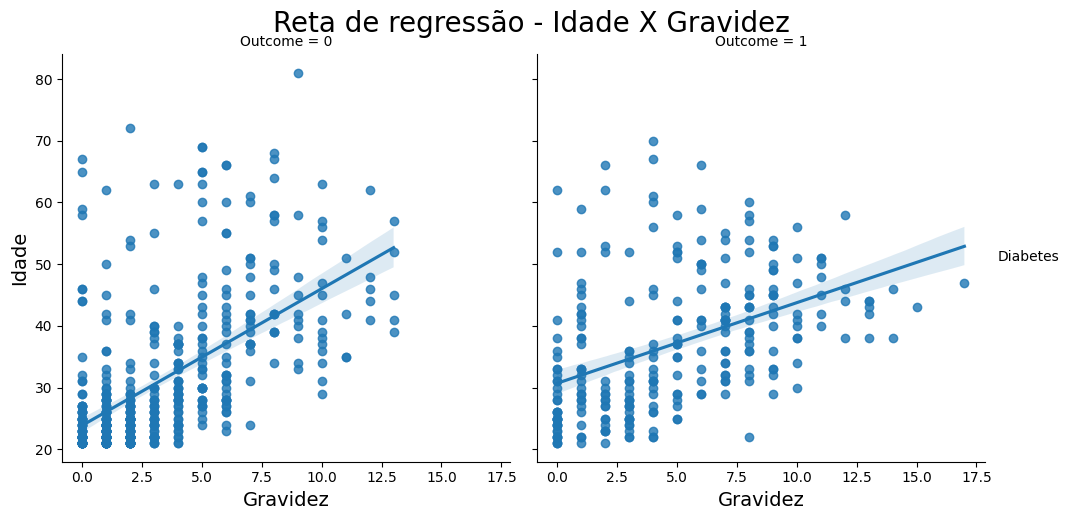

In [7]:
ax = sns.lmplot(x="Pregnancies", y="Age", data=dados, col='Outcome')
ax.fig.suptitle('Reta de regressão - Idade X Gravidez', fontsize=20, y=1.02)
ax.set_xlabels("Gravidez", fontsize=14)
ax.set_ylabels("Idade", fontsize=14)
ax.add_legend(title="Diabetes")
ax


*   Pregnancies = relação entre a variavel gravidez e a ocorrencia de diabetes só existe, por causa da relação entre gravidez e idade. Portanto, removi a variavel gravidez dos dados
*   BloodPressure =
*   SkinThickness = 






In [8]:
dados.drop("Pregnancies", axis=1, inplace=True)
dados.drop("BloodPressure", axis=1, inplace=True)
dados.drop("SkinThickness", axis=1, inplace=True)

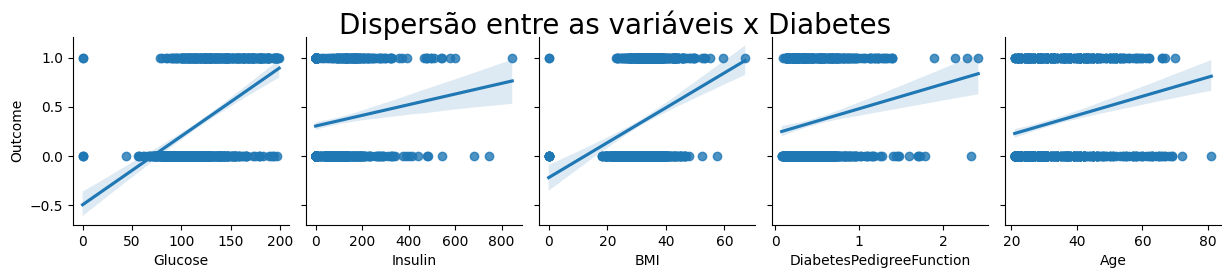

In [9]:
ax = sns.pairplot(dados, y_vars='Outcome',
                  x_vars=['Glucose', 'Insulin','BMI', 'DiabetesPedigreeFunction', 'Age'],
                  kind='reg')
ax.fig.suptitle('Dispersão entre as variáveis x Diabetes', fontsize=20, y=1.07)
ax

In [10]:
dados

,Glucose,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,148,0,33.6,0.627,50,1
1,85,0,26.6,0.351,31,0
2,183,0,23.3,0.672,32,1
3,89,94,28.1,0.167,21,0
4,137,168,43.1,2.288,33,1
...,...,...,...,...,...,...
763,101,180,32.9,0.171,63,0
764,122,0,36.8,0.340,27,0
765,121,112,26.2,0.245,30,0
766,126,0,30.1,0.349,47,1


In [25]:
Glucose_mean = dados.Glucose.mean()
Insulin_mean = dados.Insulin.mean()
BMI_mean = dados.BMI.mean()
DiabetesPedigreeFunction_mean = dados.DiabetesPedigreeFunction.mean()
Age_mean = dados.Age.mean()
print(f"Medias: \n Glucose = {Glucose_mean}\n Insulin = {Insulin_mean}\n BMI = {BMI_mean}\n DiabetesPedigreeFunction = {DiabetesPedigreeFunction_mean}\n Age = {Age_mean}\n")

Medias: 
 Glucose = 120.89453125
 Insulin = 79.79947916666667
 BMI = 31.992578124999998
 DiabetesPedigreeFunction = 0.47187630208333325
 Age = 33.240885416666664



/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


# Criando modelo

In [14]:
!pip install pyjanitor

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.4/158.4 KB 4.8 MB/s eta 0:00:00


In [15]:
import janitor as jn

from sklearn.model_selection import train_test_split

X,y = jn.get_features_targets(dados, target_columns = "Outcome")
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state =0)

/usr/local/lib/python3.9/dist-packages/janitor/utils.py:324: FutureWarning: get_features_targets() has moved. Please use ml.get_features_targets().
  warn(message, FutureWarning)
/usr/local/lib/python3.9/dist-packages/janitor/utils.py:352: DeprecationWarning: target_columns is deprecated; use target_column_names
  warn(


In [16]:
!pip install -U scikit-learn

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.dummy import DummyClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import StratifiedKFold, cross_val_score, KFold

for model in [DummyClassifier, LogisticRegression, DecisionTreeClassifier, KNeighborsClassifier, GaussianNB, SVC, RandomForestClassifier, XGBClassifier]:
  cls = model()
  kfold = KFold(n_splits = 6, random_state = 0, shuffle=True)
  s = cross_val_score(cls,X, y, scoring="roc_auc", cv=kfold)
  print(f"{model.__name__} AUC: {s.mean():.3f} | STD: {s.std():.2f}")

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


DummyClassifier AUC: 0.500 | STD: 0.00
LogisticRegression AUC: 0.830 | STD: 0.02
DecisionTreeClassifier AUC: 0.683 | STD: 0.03
KNeighborsClassifier AUC: 0.753 | STD: 0.02
GaussianNB AUC: 0.816 | STD: 0.02
SVC AUC: 0.816 | STD: 0.03
RandomForestClassifier AUC: 0.822 | STD: 0.02
XGBClassifier AUC: 0.801 | STD: 0.03


In [18]:
from sklearn.metrics import precision_score

#RandomForest
rdf = RandomForestClassifier(random_state=0,n_estimators=200, max_features="auto")
rdf.fit(X_train, y_train)
score = rdf.score(X_test, y_test).item()
print("Random Forest")
print(f'Score: {score:.3f}')
precision = precision_score(y_test, rdf.predict(X_test)).item() *100
print(f'Precisão: {precision}%')

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


Random Forest
Score: 0.799
Precisão: 67.3913043478261%


In [19]:
#XGBoost
xgb = XGBClassifier(n_estimators = 20, learning_rate=0.1, n_jobs=5)
xgb.fit(X_train, y_train)
score = xgb.score(X_test, y_test).item()
print("XGBoost")
print(f'Score: {score:.3f}')
precision = precision_score(y_test, xgb.predict(X_test)).item() *100
print(f'Precisão: {precision:.2f}%')

XGBoost
Score: 0.792
Precisão: 66.67%


/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [42]:
# Teste com os dois modelos com entradas criadas pelo autor
df_teste_modelo = pd.DataFrame.from_dict([
{'Glucose': 125, 'Insulin': 79,'BMI': 31, 'DiabetesPedigreeFunction': 0.47, 'Age': 32},
{'Glucose': 150, 'Insulin': 79,'BMI': 31, 'DiabetesPedigreeFunction': 0.47, 'Age': 32}])

pred_test_xgb = xgb.predict(df_teste_modelo)
pred_test_rdf = rdf.predict(df_teste_modelo)
print(f"Resultado Teste RandomForest:{pred_test_rdf}")
print(f"Resultado Teste XGBoost:{pred_test_xgb}")

Resultado Teste RandomForest:[0 1]
Resultado Teste XGBoost:[1 1]


/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
